# Exploratory Data Analysis

## Dependencies

In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!tree ../Project_data/

../Project_data/
└── bank-additional
    ├── bank-additional.csv
    ├── bank-additional-full.csv
    └── bank-additional-names.txt

1 directory, 3 files


## Load Dataset

There are two files but since bank-additional.csv is in bank-additional-full.csv, this file will be ignored.

In [3]:
dataset = pd.read_csv('../Project_data/bank-additional/bank-additional-full.csv', delimiter=';')
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Descriptive Analysis

### Data Types and Missing values

In [4]:

def get_python_types(dataset):
    # get the Python data types 
    python_types=[]

    for i in dataset:
        for j in dataset[i]:
            python_types.append(str(type(j))[8:-2])
            break

    python_types=pd.Series(python_types,index=dataset.columns)

    return python_types

python_types=get_python_types(dataset)

In [5]:
    
def get_data_types(dataset):
    # Return a dataframe with data types and % of missing values
    pd_types=dataset.dtypes
    record_count=dataset.count()
    missing_values=dataset.isnull().sum()
    p_missing=missing_values/(record_count+missing_values)*100
    keys=['Pandas types','Python types','Number of records','Number of missing values','% of missing values']

    data_types=pd.concat([pd_types,python_types,record_count,missing_values,p_missing],axis=1,keys=keys)

    return data_types

In [6]:
get_data_types(dataset)

,Pandas types,Python types,Number of records,Number of missing values,% of missing values
age,int64,int,41188,0,0.0
job,object,str,41188,0,0.0
marital,object,str,41188,0,0.0
education,object,str,41188,0,0.0
default,object,str,41188,0,0.0
housing,object,str,41188,0,0.0
loan,object,str,41188,0,0.0
contact,object,str,41188,0,0.0
month,object,str,41188,0,0.0
day_of_week,object,str,41188,0,0.0


Missing values were not found in the dataset

### Null Values

In [7]:
#dataset[dataset.isna()]
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Duplicate values 

In [8]:
# see if there are duplicate values
dataset.duplicated().any()

True

In [9]:
dataset[dataset.duplicated()][['age','job','marital','education','default','housing']]

,age,job,marital,education,default,housing
1266,39,blue-collar,married,basic.6y,no,no
12261,36,retired,married,unknown,no,no
14234,27,technician,single,professional.course,no,no
16956,47,technician,divorced,high.school,no,yes
18465,32,technician,single,professional.course,no,yes
20216,55,services,married,high.school,unknown,no
20534,41,technician,married,professional.course,no,yes
25217,39,admin.,married,university.degree,no,no
28477,24,services,single,high.school,no,yes
32516,35,admin.,married,university.degree,no,yes


In [10]:
# remove duplicate values
dataset.drop_duplicates(inplace=True ,ignore_index=True)

In [11]:
#dataset = dataset.reindex(np.arange(len(dataset.index)))
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Numerical Attributes

#### Descriptive statistics 

In [12]:
def quantile_statistics(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    
    # interquartile range
    
    IQR=Q3-Q1
    IQR.name='IQR'
   
    return IQR,Q1,Q3

In [13]:
IQR,_,_ = quantile_statistics(dataset)
IQR

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
Name: IQR, dtype: float64

In [14]:
desc_statistics=dataset.describe()
desc_statistics=desc_statistics.append(IQR,ignore_index=False)
desc_statistics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000
IQR,15.00000,217.000000,2.000000,0.000000,0.000000,3.200000,0.919000,6.300000,3.617000,129.000000


#### Histograms

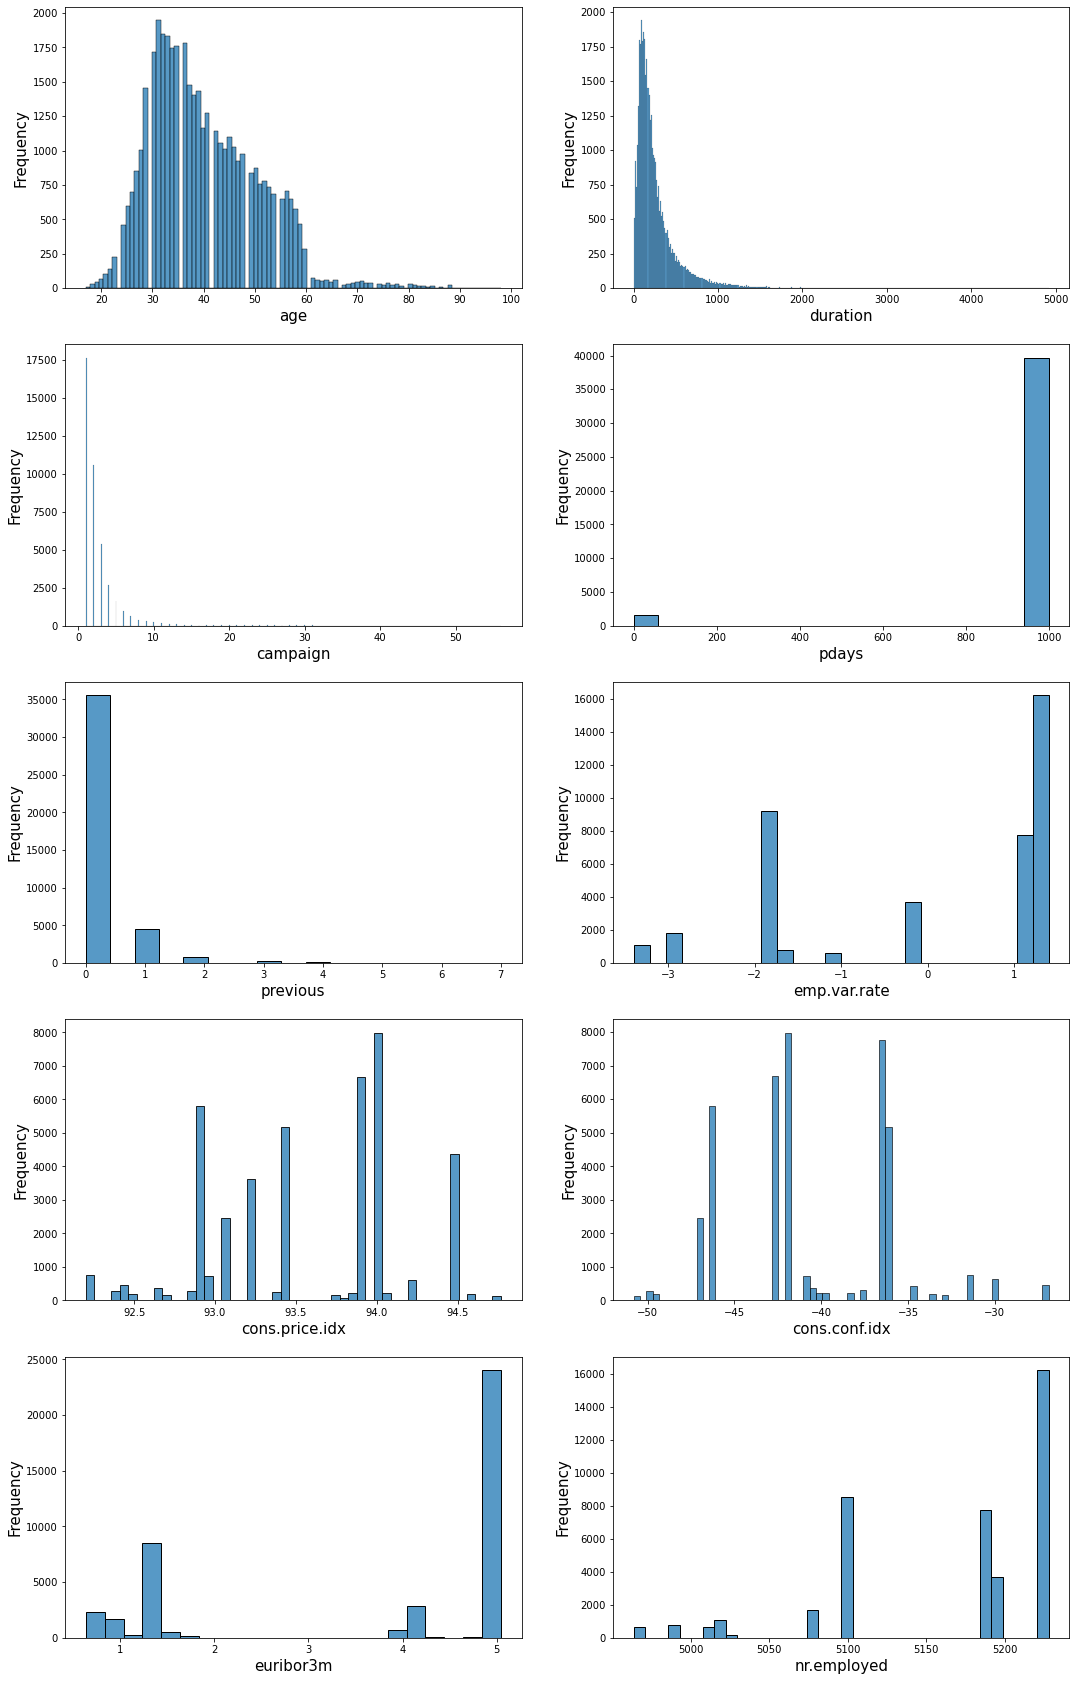

In [15]:


numerical_att=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(5,2,figsize=(18,30))
#fig,((ax1),(ax2),(ax3),(ax4),(ax5),(ax6),(ax7),(ax8),(ax9),(ax10))=plt.subplots(10,1,figsize=(18,70))

axes=fig.get_axes()

for i,att in enumerate(numerical_att):
    plot_histogram(dataset,att,axes[i])

In the graphics you can see the following:


* The **duration** and **campaign** attributes have a skewed distribution which may be due to outliers.
* The **age** attribute has a distribution that seems normal, but it also has a long tail shape. 
* Most of the people weren't contacted before, that's why the **pdays** attribute has that distribution.
* The **previous** attribute has low variance.
* The **emp.var.rate** and **nr.employed** attributes have few different values.

In [16]:
dataset['nr.employed'].value_counts()  # to categorical 

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [17]:
dataset['euribor3m'].describe()

count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [18]:
dataset['euribor3m'].value_counts() # can be divided in feature eng..

4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
1.047       1
0.933       1
3.329       1
3.816       1
1.574       1
Name: euribor3m, Length: 316, dtype: int64

In [19]:
((2<dataset['euribor3m']) & (dataset['euribor3m']<4)).sum()

14

In [20]:
dataset['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [21]:
dataset['emp.var.rate'].describe()

count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [22]:
dataset.previous.value_counts() # to categorical or remove

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [23]:
dataset.previous.describe()

count    41176.000000
mean         0.173013
std          0.494964
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [24]:
dataset['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [25]:
dataset['pdays'].describe()

count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

#### Outliers

##### Approaches to dealing with outliers
* Visualizations and descriptive statistics to detect potential outliers
* Filtering by fixed threshold
* Clipping the attribute at a computed percentile ( 99%)
* log of every value
* IQR Score






In [26]:
potential_outliers = ["age", "duration", "campaign"]

##### Filtering by fixed threshold: 
* There is not any attribute in which to apply this approach is reasonable. 
* The **age** attribute has a maximum value of 98 and this value is correct.

##### Clipping the attribute at a computed percentile

In [27]:
# Calculate percentile 0.99 for age, duration and campaign
max_threshold = dataset[potential_outliers].quantile(0.99)
max_threshold

age           71.00
duration    1271.25
campaign      14.00
Name: 0.99, dtype: float64

In [28]:
(dataset[potential_outliers] < max_threshold).sum()

age         40755
duration    40764
campaign    40701
dtype: int64

In [29]:
dataset = dataset[~((dataset[potential_outliers] < max_threshold).sum(axis=1) != 3)]
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [30]:
#dataset=dataset.reindex( index=range(len(list(dataset.index))) )

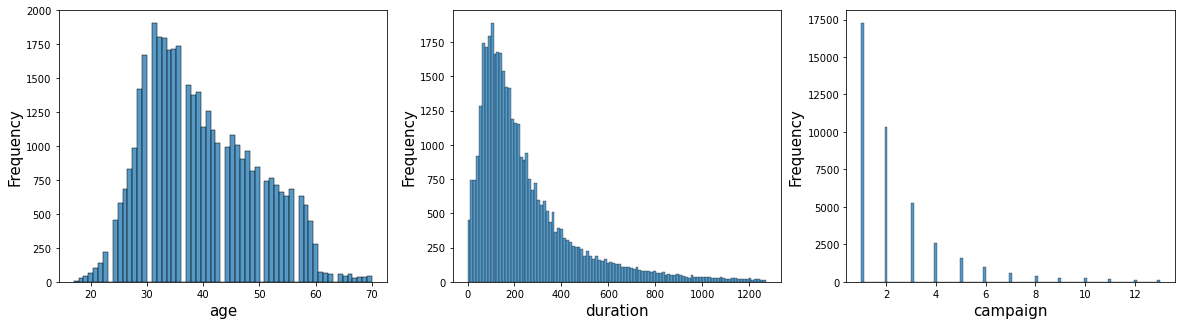

In [31]:


def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(20,5))
axes=fig.get_axes()

for i,att in enumerate(potential_outliers):
    plot_histogram(dataset,att,axes[i])

Better, but still some large outlier values in **duration** and **campaign**

##### Log of every value

In [32]:
def log_scal(x):
    return np.log(x+1)

In [33]:
dataset.loc[:,'duration' ] = dataset['duration'].apply(log_scal)

In [34]:
dataset['duration'].describe()

count    39872.000000
mean         5.161927
std          0.881968
min          0.000000
25%          4.644391
50%          5.192957
75%          5.752573
max          7.148346
Name: duration, dtype: float64

In [35]:
dataset.loc[:,'campaign' ] = dataset['campaign'].apply(log_scal)

In [36]:
dataset['campaign'].describe() 

count    39872.000000
mean         1.097673
std          0.449664
min          0.693147
25%          0.693147
50%          1.098612
75%          1.386294
max          2.639057
Name: campaign, dtype: float64

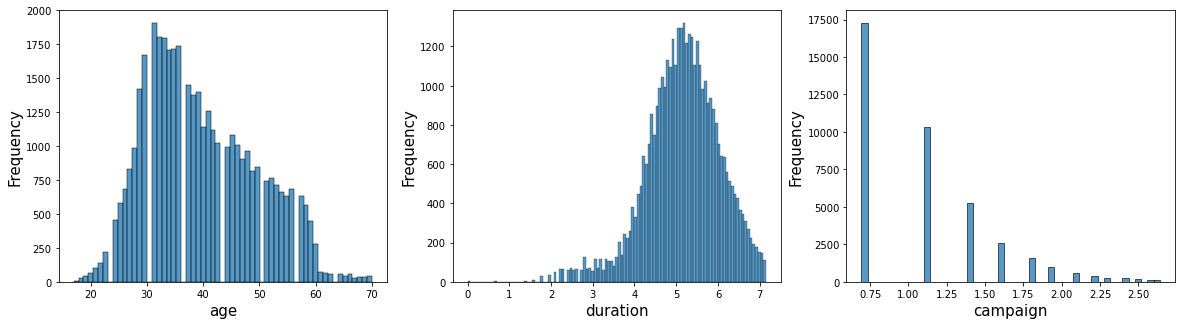

In [37]:

def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(20,5))
axes=fig.get_axes()

for i,att in enumerate(potential_outliers):
    plot_histogram(dataset,att,axes[i])

**duration** looks more normal and **campaign** has less tail

##### IQR Score

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.

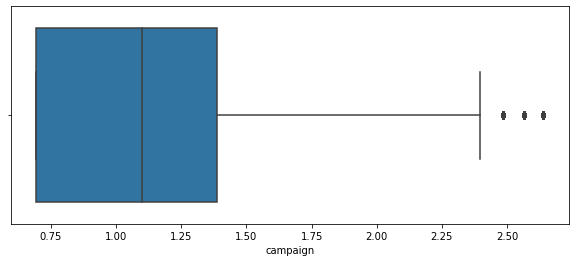

In [38]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="campaign",data=dataset, linewidth=1.5 )
plt.show()

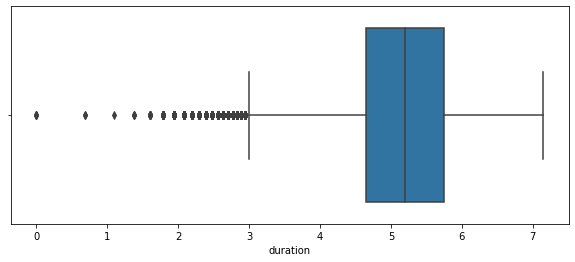

In [39]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="duration",data=dataset, linewidth=1.5 )
plt.show()


As you can see from the box-and-whisker plots, there are still outliers in the attributes

In [40]:
def quantile_statistics(att):
    Q1=att.quantile(0.25)
    Q3=att.quantile(0.75)
    
    # interquartile range 
    IQR=Q3-Q1
   
    return IQR,Q1,Q3

In [41]:

# calculate quantile statistics 
IQR_campaign,Q1_campaign,Q3_campaign=quantile_statistics(dataset['campaign'])
IQR_duration,Q1_duration,Q3_duration=quantile_statistics(dataset['duration'])


# calculate the whiskers 
lower_whisker_campaign=Q1_campaign - 1.5 * IQR_campaign
top_whisker_campaign=Q3_campaign + 1.5 * IQR_campaign

lower_whisker_duration=Q1_duration - 1.5 * IQR_duration
top_whisker_duration=Q3_duration + 1.5 * IQR_duration


# find outliers
outliers_location_campaign=(dataset['campaign'] < lower_whisker_campaign )\
                                 |(dataset['campaign'] > top_whisker_campaign )

outliers_location_duration=(dataset['duration'] < lower_whisker_duration )\
                                 |(dataset['duration'] > top_whisker_duration )

In [42]:
dataset = dataset[~outliers_location_campaign & ~outliers_location_duration] 

In [43]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,0.693147,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,0.693147,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0.693147,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,1.098612,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


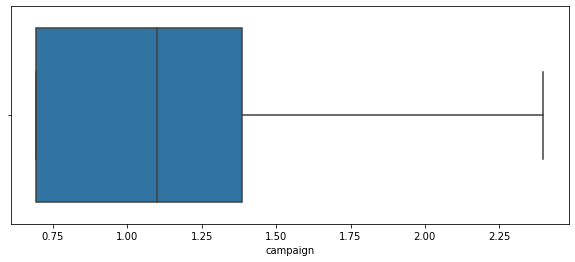

In [44]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="campaign",data=dataset, linewidth=1.5 )
plt.show()

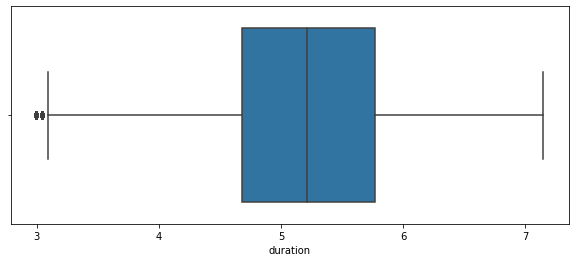

In [45]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="duration",data=dataset, linewidth=1.5 )
plt.show()

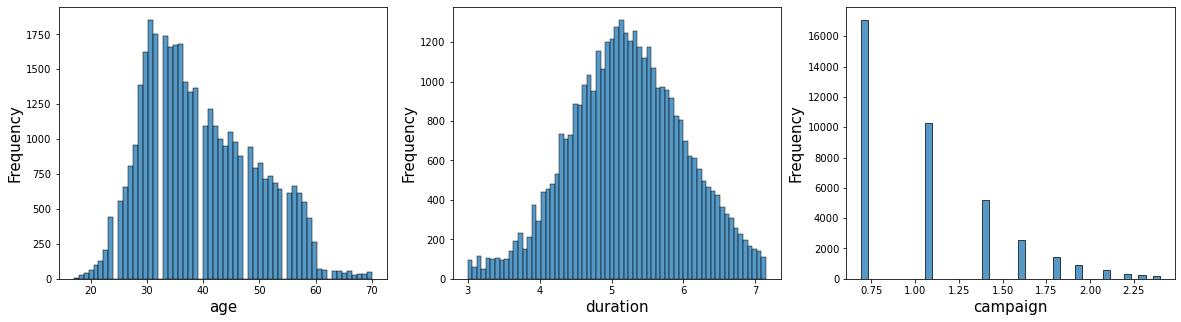

In [46]:

def plot_histogram(dataset,attribute,ax):
    #ax.hist(dataset[attribute],bins=50)
    sns.histplot(data=dataset,x=attribute,ax=ax)
    ax.set_xlabel(attribute,fontsize=15)
    ax.set_ylabel('Frequency',fontsize=15)
    

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=(20,5))
axes=fig.get_axes()

for i,att in enumerate(potential_outliers):
    plot_histogram(dataset,att,axes[i])

Now, our data is more useful than the original data

In [47]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.693147,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,0.693147,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,0.693147,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0.693147,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,1.098612,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


#### Transformation

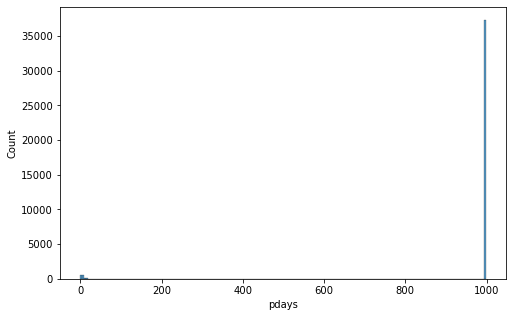

In [48]:
fig,ax=plt.subplots(1,figsize=(8,5))
sns.histplot(data=dataset,x='pdays',ax=ax,bins=200)
plt.show()

* Most of the people weren't contacted before, that's why the pdays attribute has that distribution.


A new attribute will be created from pdays

In [49]:
#pd.cut(dataset.pdays,4)

In [50]:
track_categories = ["bad", "fair", "good", "excellent"]
customer_tracking = []

In [51]:
def discretize_pdays(x):
    
    if 0<=x and x<=3:
        return 'excellent'
        
    elif 3<x and x<=7:
        return "good"
    
    elif 7<x and x<=30:
        return 'fair'
    
    else:
        return 'bad'

In [52]:
pd.options.mode.chained_assignment = None
dataset.pdays = dataset.pdays[:].apply(discretize_pdays)

In [53]:
dataset.pdays.value_counts()

bad          37314
good           588
excellent      501
fair           315
Name: pdays, dtype: int64

In [54]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.693147,bad,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.693147,bad,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.693147,bad,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.693147,bad,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.693147,bad,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,0.693147,bad,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,0.693147,fair,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0.693147,bad,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,1.098612,bad,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


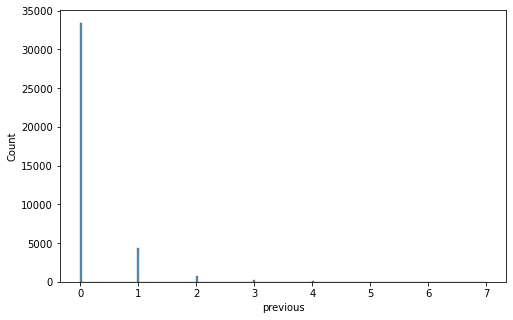

In [55]:
fig,ax=plt.subplots(1,figsize=(8,5))
sns.histplot(data=dataset,x='previous',ax=ax,bins=200)
plt.show()

Before **previous** attribute has very low variance, it will be removed since this will not harm the performance of the model, and it can reduce the complexity of the model.


* The emp.var.rate and nr.employed attributes have few different values.

### Categorical Attributes

In [56]:
cols = dataset.columns
num_cols = dataset._get_numeric_data().columns
categorical_att = list(set(cols) - set(num_cols))
#y = categorical_att.pop(3)


In [57]:
categorical_att

['day_of_week',
 'marital',
 'pdays',
 'default',
 'job',
 'y',
 'loan',
 'contact',
 'education',
 'month',
 'poutcome',
 'housing']

In [58]:
"""fig,ax=plt.subplots(1,figsize=(8,5))
sns.countplot(data=dataset,x=,ax=ax)
plt.show()"""

'fig,ax=plt.subplots(1,figsize=(8,5))\nsns.countplot(data=dataset,x=,ax=ax)\nplt.show()'

#### Cardinality

In [59]:
pd.DataFrame(dataset[categorical_att].nunique(),columns= ['unique values'])

,unique values
day_of_week,5
marital,4
pdays,4
default,3
job,12
y,2
loan,3
contact,2
education,8
month,10


#### Unique counts

In [60]:
import matplotlib
# only to improve the plots

font = {
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

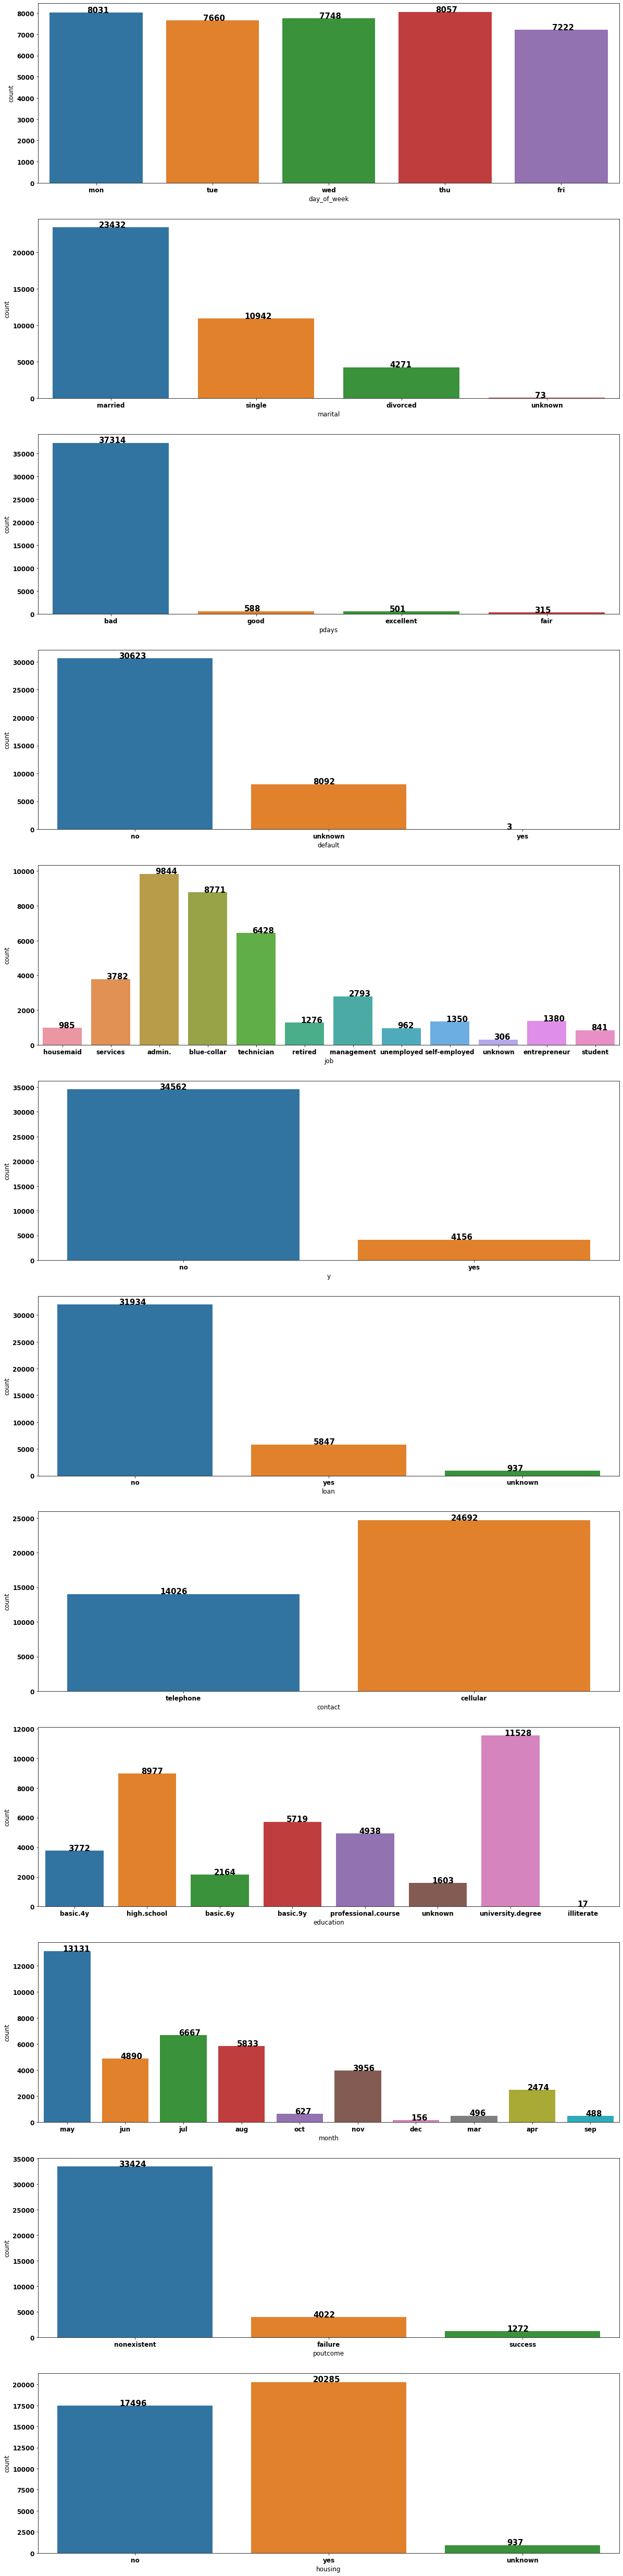

In [61]:
def plot_bar(dataset,att,ax):
    sns.countplot(data=dataset,x=att,ax=ax)
    

fig,((ax1),(ax2),(ax3),(ax4),(ax5),(ax6),(ax7),(ax8),(ax9),(ax10),(ax11),(ax12))=plt.subplots(12,1,figsize=(20,90))
axes=fig.get_axes()

for i,att in enumerate(categorical_att):
    plot_bar(dataset,att,axes[i])
    for p in axes[i].patches:
        #pass
        axes[i].text (p.get_x()+(p.get_width())/2.5,p.get_height(),"{}".format(p.get_height()), weight='bold',size=15)

* **pdays** attribute will be removed because it has a very small entropy, which means that most of the records are in **bad** category.
* The categories **illiterate**,**yes** and **unknown** will be removed from **education**, **default** and **marital** respectively.
* the Target **y** will be treated to mitigate class imbalance.


In [62]:
# remove pdays attribute
dataset.drop(['pdays'],axis=1 ,inplace=True)

In [63]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,5.568345,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,5.010635,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,5.424950,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,5.023881,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,5.730100,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,5.641907,0.693147,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,4.727388,0.693147,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,5.950643,0.693147,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,5.247024,1.098612,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [64]:
dataset.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [65]:
# remove 'illiterate' from education attribute
dataset = dataset[~(dataset.education == 'illiterate')]
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,5.568345,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,5.010635,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,5.424950,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,5.023881,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,5.730100,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,5.641907,0.693147,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,4.727388,0.693147,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,5.950643,0.693147,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,5.247024,1.098612,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [66]:
# remove 'yes' from default attribute
dataset = dataset[~(dataset.default == 'yes')]
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,5.568345,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,5.010635,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,5.424950,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,5.023881,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,5.730100,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,5.641907,0.693147,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,4.727388,0.693147,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,5.950643,0.693147,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,5.247024,1.098612,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [67]:
# remove 'unknown' from marital attribute
dataset = dataset[~(dataset.marital == 'unknown')]
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,5.568345,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,5.010635,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,5.424950,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,5.023881,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,5.730100,0.693147,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,5.641907,0.693147,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,4.727388,0.693147,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,5.950643,0.693147,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,5.247024,1.098612,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


#### Imbalance Target

## Correlation analysis

In [68]:
categorical_att.remove('pdays')

In [69]:
categorical_att

['day_of_week',
 'marital',
 'default',
 'job',
 'y',
 'loan',
 'contact',
 'education',
 'month',
 'poutcome',
 'housing']

### Categorial vs Categorical

In [114]:
#pd.crosstab(index=dataset['housing'], columns=dataset['y'],normalize= 'index' ) 

y,no,yes
housing,,
no,0.896767,0.103233
unknown,0.895299,0.104701
yes,0.889196,0.110804


#### Contingency tables

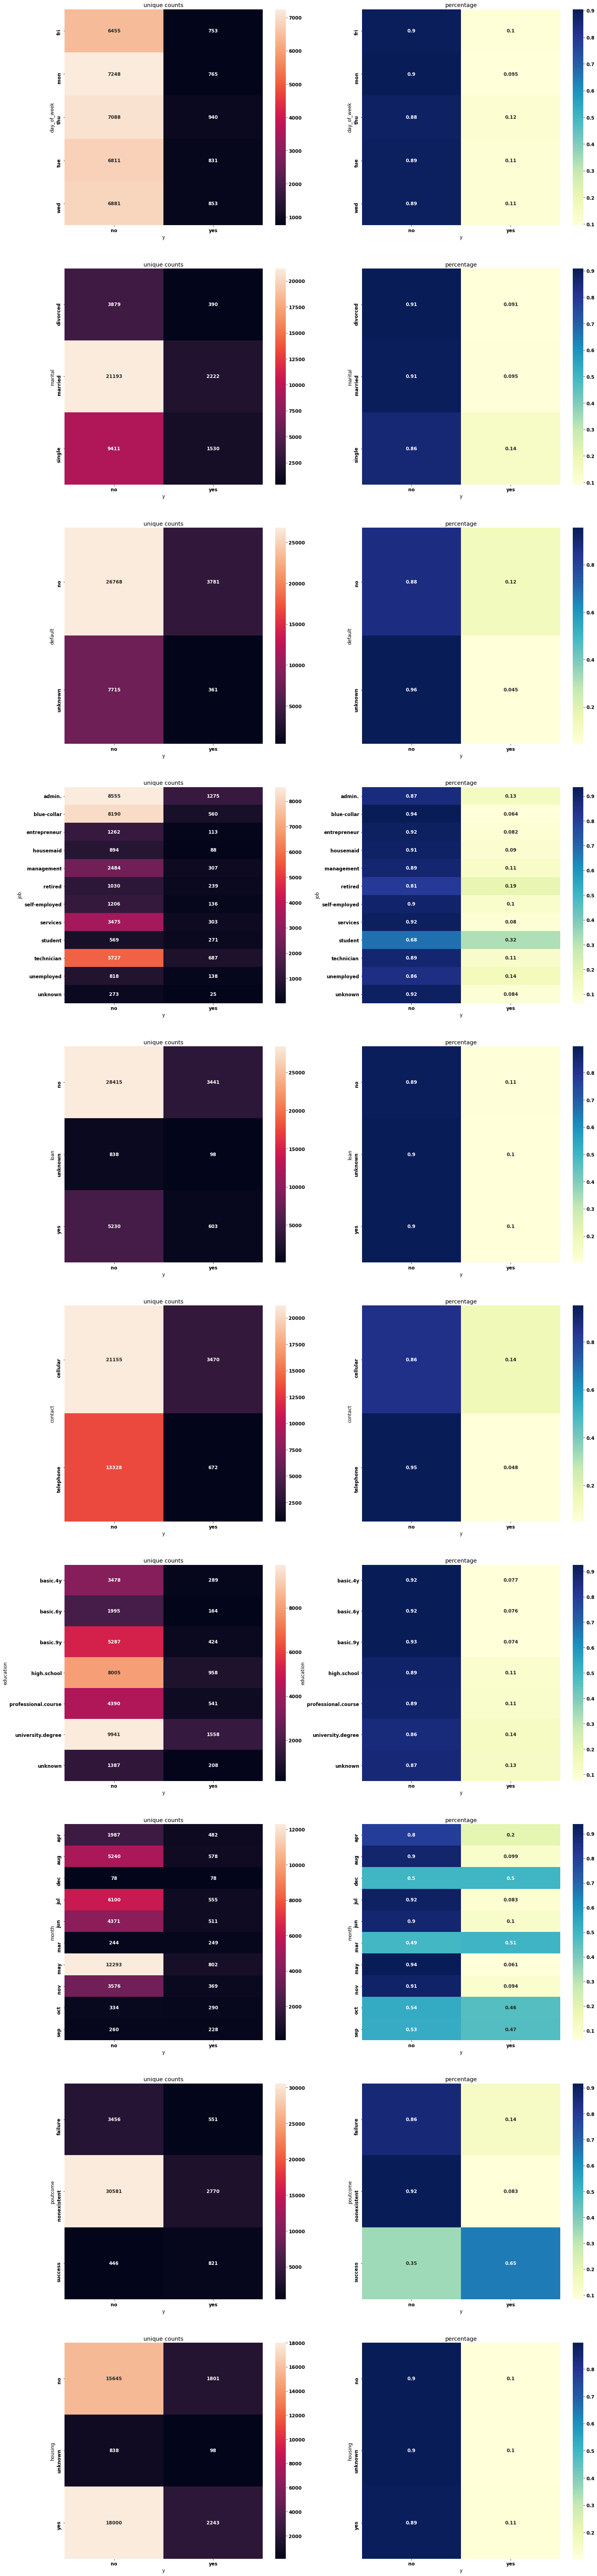

In [154]:
categorical_att.pop(4)
 
def plot_contin_table(dataset,att,axs):   
    
    sns.heatmap(pd.crosstab(index=dataset[att], columns=dataset['y']),ax=axs[0],annot=True,fmt='d')
    sns.heatmap(pd.crosstab(index=dataset[att], columns=dataset['y'],normalize= 'index'),\
                ax=axs[1],annot=True, cmap="YlGnBu")
    axs[0].set_title('unique counts')
    axs[1].set_title('percentage')
    
    
    
fig, ((ax1a,ax1b),(ax2a,ax2b) ,(ax3a,ax3b) ,(ax4a,ax4b) ,(ax5a,ax5b) ,(ax6a,ax6b) ,(ax7a,ax7b), \
(ax8a,ax8b) ,(ax9a,ax9b) ,(ax10a,ax10b) )  = plt.subplots(10,2,figsize=(25,120))

axes=fig.get_axes()

for i,att in enumerate(categorical_att):
    plot_contin_table(dataset,att,axes[2*i:2*i+2])



#### Chi-squared Test

In [ ]:
def chi_squared(contingency_table):
    
    """ function to performed the chi-squared test"""
    
    stat, p, dof, expected = chi2_contingency(contingency_table)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Interpret test-statistic')
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('\n')

    # interpret p-value
    alpha = 1.0 - prob
    print('Interpret p-value')
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

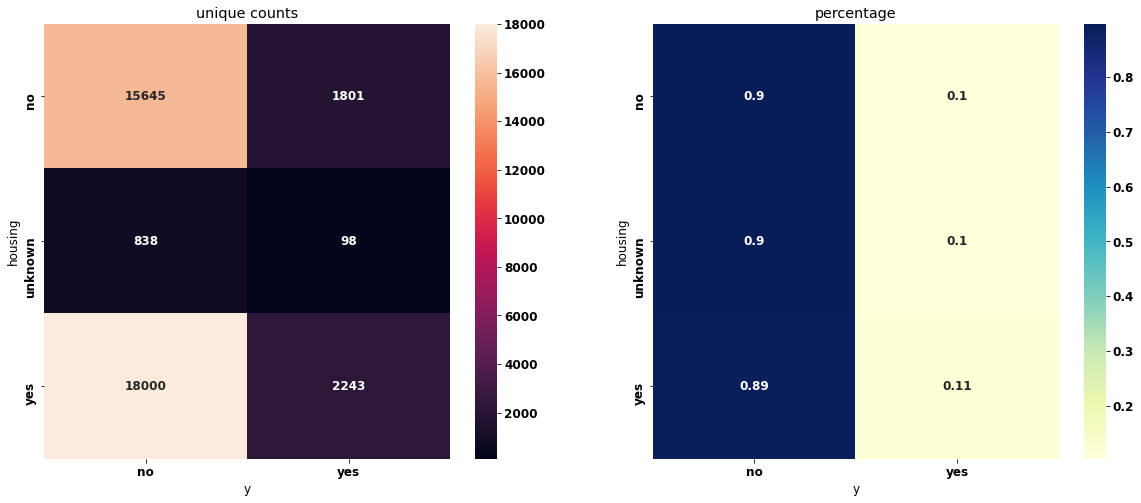

In [127]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(pd.crosstab(index=dataset['housing'], columns=dataset['y']),ax=ax1,annot=True,fmt='d')
sns.heatmap(pd.crosstab(index=dataset['housing'], columns=dataset['y'],normalize= 'index'),\
            ax=ax2,annot=True, cmap="YlGnBu")
ax1.set_title('unique counts')
ax2.set_title('percentage')
plt.show()